In [1]:
using ModelingToolkit

┌ Info: Precompiling ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78]
└ @ Base loading.jl:1313


$$ T_D (n, e_c) = J \frac{d^2 \theta_0 (t)}{dt^2} + B \frac{d \theta_0 (t)}{dt} $$

- $T_D$ : Torque Developed
- $J$ : Inertia
- $B$ : Dampening


Kim, et. al. 2011:

$$ \dot\theta = \omega$$
$$ \dot\omega = \frac{1}{J} ( -K_m i_a sin(N_r \theta) + K_m i_b cos(N_r \theta) - B \omega - \tau)$$
$$ \dot i_a = \frac{1}{L} ( v_a - R i_a + K_m sin(N_r \theta))$$
$$ \dot i_b = \frac{1}{L} ( v_b - R i_b - K_m cos(N_r \theta))$$


In [54]:
using ModelingToolkit, OrdinaryDiffEq

@parameters t J Km Nr B τ R va vb L
@variables θ(t) ω(t) ia(t) ib(t)
D = Differential(t)

eqs = [D(θ) ~ ω,
       D(ω) ~ (1/J)*(-Km*ia*sin(Nr*θ) + Km*ib*cos(Nr*θ) - B * ω - τ),
       D(ia) ~ (1/L)*(va - R * ia + Km *ω*sin(Nr*θ)),
       D(ib) ~ (1/L)*(vb - R * ib - Km *ω*cos(Nr*θ))]

sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

ODESystem(Equation[Equation(Differential(θ(t)), ω(t)), Equation(Differential(ω(t)), (1 / J) * ((((((-Km) * ia(t)) * sin(Nr * θ(t))) + ((Km * ib(t)) * cos(Nr * θ(t)))) - (B * ω(t))) - τ)), Equation(Differential(ia(t)), (1 / L) * ((va - (R * ia(t))) + ((Km * ω(t)) * sin(Nr * θ(t))))), Equation(Differential(ib(t)), (1 / L) * ((vb - (R * ib(t))) - ((Km * ω(t)) * cos(Nr * θ(t)))))], t, Term{Real}[θ(t), ω(t), ia(t), ib(t)], Sym{ModelingToolkit.Parameter{Real}}[Km, τ, J, Nr, B, L, R, va, vb], Num[], Equation[], Base.RefValue{Vector{Num}}(Num[]), Base.RefValue{Any}(Matrix{Num}(undef, 0, 0)), Base.RefValue{Matrix{Num}}(Matrix{Num}(undef, 0, 0)), Base.RefValue{Matrix{Num}}(Matrix{Num}(undef, 0, 0)), Symbol("##ODESystem#385"), ODESystem[])

In [60]:
u0 = [θ => 1.0,
      ω => 1.0,
      ia => 8.0,
      ib => 8.0]

p  = [J => 6.8e-5, # kg⋅m²
      Km => (0.44/1.68), # N⋅m/A
      Nr => 50.0,
      B => 0.001,
      va => 12,
      vb => 12,
      R  => 1.65,
      τ => 0,
      L => 2.8]

9-element Vector{Pair{Num, Float64}}:
  J => 6.8e-5
 Km => 0.2619047619047619
 Nr => 50.0
  B => 0.001
 va => 12.0
 vb => 12.0
  R => 1.65
  τ => 0.0
  L => 2.8

In [63]:
tspan = (0.0,1.0)
prob = ODEProblem(sys,u0,tspan,p)
@time sol = solve(prob,Tsit5())

  2.322673 seconds (2.71 M allocations: 145.650 MiB, 1.30% gc time, 99.91% compilation time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1399-element Vector{Float64}:
 0.0
 5.292967430996993e-5
 0.00019686301510590622
 0.0004216182767439133
 0.0007098285381061241
 0.0010890202414513186
 0.0014723651922847047
 0.0019038524578320296
 0.0025652382705268553
 0.002986011107478693
 0.0036673289423013395
 0.004167920638850459
 0.004940107249285789
 ⋮
 0.9924781384678879
 0.9932099965336237
 0.9938911639169412
 0.9946508738723071
 0.9953825043348226
 0.9960638602135301
 0.9968236939676387
 0.9975551137469713
 0.9982366425651784
 0.9989966048558868
 0.9997277877631336
 1.0
u: 1399-element Vector{Vector{Float64}}:
 [1.0, 1.0, 8.0, 8.0]
 [1.0001058285094784, 2.997559487079204, 7.999974744296369, 7.999967757378368]
 [1.000924680947764, 8.356603162715015, 7.999894879686909, 7.99983168174062]
 [1.0037035249235815, 16.232815282234853, 7.999759824369216, 7.999478592690687]
 [1.009636069521209, 24.463913695304846, 7.999673924983975, 7.998803611690392]
 [1.0201

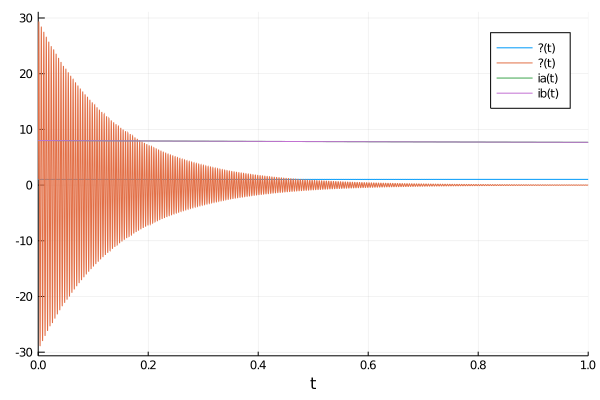

In [64]:
using Plots; plot(sol)